# Ensembles and random forest
## Bagging

## Libraeies

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

## Bootstrapping

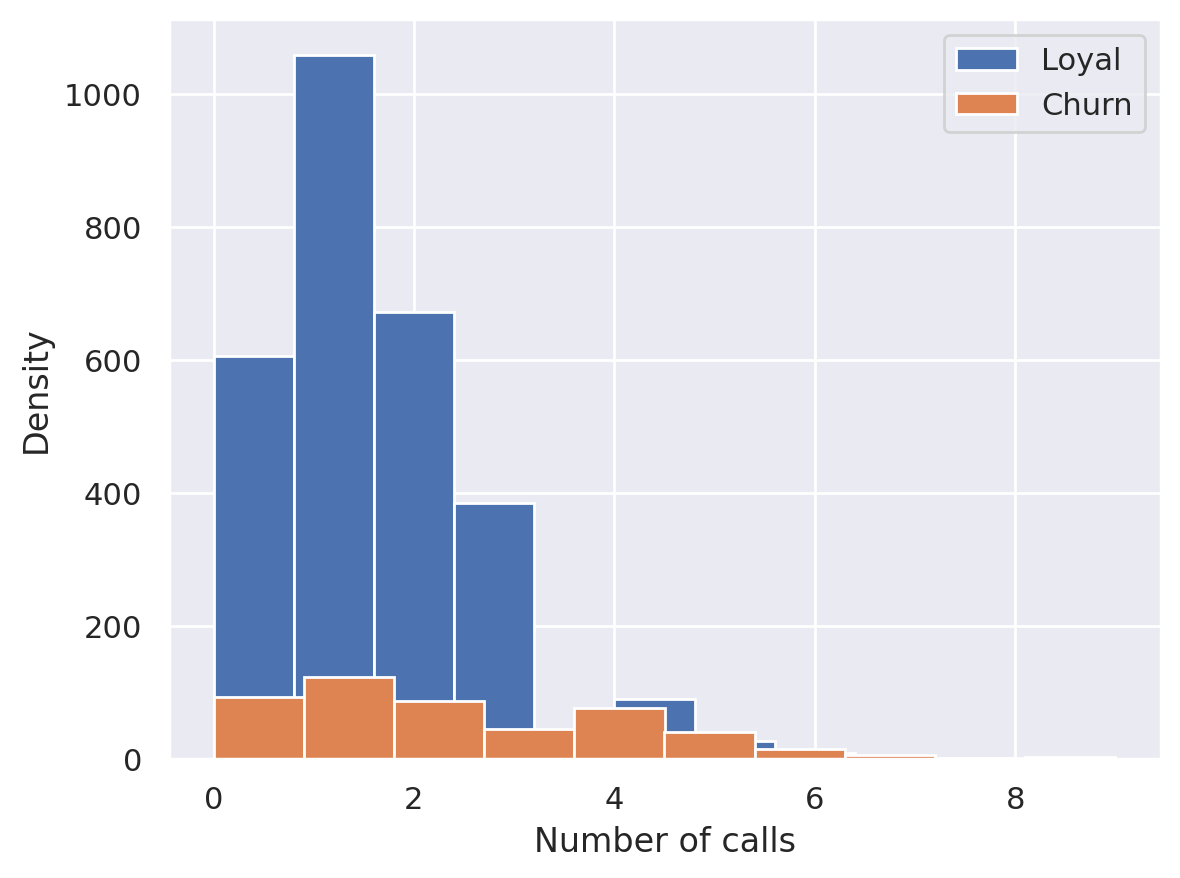

In [2]:
telecom_data = pd.read_csv("../../data/telecom-churn.csv")

telecom_data.loc[telecom_data["Churn"] == False, "Customer service calls"].hist(
    label="Loyal"
)
telecom_data.loc[telecom_data["Churn"] == True, "Customer service calls"].hist(
    label="Churn"
)
plt.xlabel("Number of calls")
plt.ylabel("Density")
plt.legend();

In [44]:
def get_bootstrap_means(data, n_samples, random_seed=0):
    """Generate bootstrap samples using the bootstrap method."""
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices].mean(axis=1)
    return samples

def get_bootstrap_samples(data, n_samples):
    """Generate bootstrap samples using the bootstrap method."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    """Produce an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
    return boundaries

In [25]:
# Save the data about the loyal and former customers to split the dataset
loyal_calls = telecom_data.loc[
    telecom_data["Churn"] == False,
    "Customer service calls"
].values

churn_calls = telecom_data.loc[
    telecom_data["Churn"] == True,
    "Customer service calls"
].values

In [49]:
# Generate the samples using bootstrapping and calculate the mean for each of them
loyal_mean_scores = get_bootstrap_means(loyal_calls, 1000)
churn_mean_scores = get_bootstrap_means(churn_calls, 1000)

# Print the resulting interval estimates
print(
    "Service calls from loyal: mean interval",
    stat_intervals(loyal_mean_scores, 0.05)
)
print(
    "Service calls from churn: mean interval",
    stat_intervals(churn_mean_scores, 0.05)
)

Service calls from loyal: mean interval [1.4077193  1.49473684]
Service calls from churn: mean interval [2.07660455 2.38923395]
